<a href="https://colab.research.google.com/github/Matias-UBB/Ayudantia/blob/main/N%C3%BAmeros_Modelo_secuencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numeros escrito a mano

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Se crea una variable mnist donde se descargan los datos del set de numeros 
# escritos a manos
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


9
7


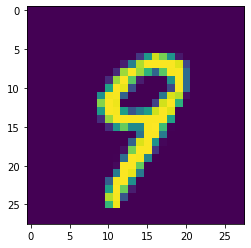

In [ ]:
plt.figure()
#se grafica un nuemro para verificar si coincide con la etiqueta de resultado 
plt.imshow(x_train[423])
print(y_train[423])
print(y_test[0])

In [ ]:
# se dividen los valores de las entradas y los test en 255 lo que permite
#obtener que cada pixel este en un numero entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Se crea un modelo secuencial
# flaten aplasta un verctor convierte una matriz en este caso 28x28 a un solo vector
# se crea una capa Densa (DENSE) la cual en terminos simples nos dicen que todas las neoronas 
# de cada capa estan conectadas con todas las de la siguiente capa asi 128 veces 
#Dropout es una funcion de sobreajuste, esta funcion desactiva aleatoeamente una 
# neurona lo que ayuda a evitar que las caracteristicas de cada neurona dependan de las otras 
# se crean 10 capas densas para las salida de un numero de 1 al 10
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#el modelo de optimizacion es adam 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.9158
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1389 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1050 - accuracy: 0.9683
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0871 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0730 - accuracy: 0.9768
313/313 - 1s - loss: 0.0690 - accuracy: 0.9787 - 588ms/epoch - 2ms/step


[0.06902080774307251, 0.9786999821662903]

In [ ]:

prediction= model.predict(x_test[0])
prediction[0]

1/1 [==============================] - 0s 21ms/step


array([6.3872768e-08, 4.7302532e-08, 5.4512457e-05, 4.5520309e-04,
       1.4850955e-10, 6.0163495e-07, 2.9623532e-12, 9.9937755e-01,
       1.5976219e-06, 1.1046919e-04], dtype=float32)

In [ ]:
np.argmax(prediction[0])


7